In [1]:
import numpy as np
from numpy import log10, pi
import matplotlib.pyplot as plt
from gw_functions_har import response, waveform
from constants import *

In [2]:
a1=19;b1=9;e1=-37;d1=44

In [3]:
gwra=pi
gwdec= -pi/4

psrra=     15*(a1+b1/60)*pi/180
psrdec =   (e1+e1/np.abs(e1)*d1/60)*pi/180
psigw=0

In [4]:
ti=0;tf=10*yr

In [5]:
f_obs=9.33254e-9;n_obs=2

In [6]:
t_arr=np.linspace(ti,tf,1000)

In [7]:
m1=1e10*MS;m2=m1;i=pi/3;r=1e9*pc;key=1

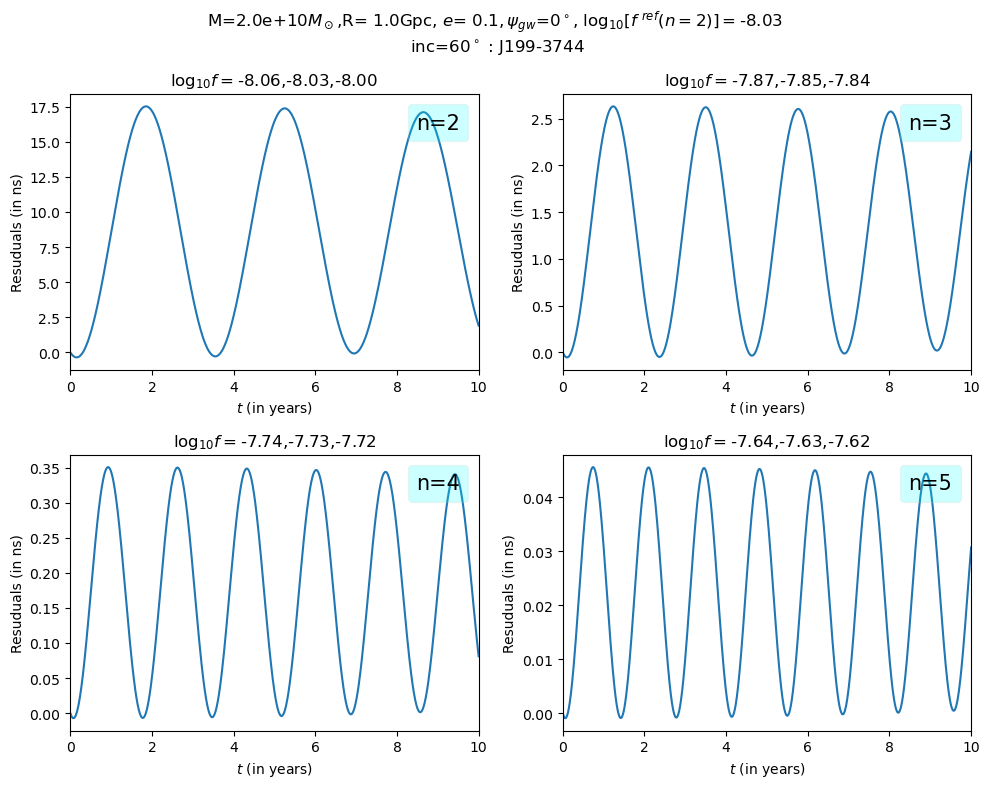

In [8]:
e=0.1
plt.figure(figsize=(10,8))
s=1
while s<=4:
    plt.subplot(2,2,s)
    fs=waveform(m1,m2,0.1,s+1,i,f_obs,n_obs,r,t_arr[-1],key)[2]
    plt.plot(t_arr/yr,response(m1,m2,e,s+1,i,f_obs,n_obs,r,ti,t_arr
             ,key,gwra, gwdec, psrra, psrdec,
             psigw)/1e-9,label='n='+str(s+1))
    plt.title('$\log_{10} f=$'
            +str("{:.2f}".format(log10(fs[0])))+','+str("{:.2f}".format(log10(fs[1])))+
             ','+str("{:.2f}".format(log10(fs[2]))))
    plt.legend(facecolor='cyan', framealpha=0.2,handlelength=0, 
               handletextpad=0, fancybox=True,fontsize=15,loc='upper right')
    plt.xlim([t_arr[0]/yr,t_arr[-1]/yr])
    s+=1
    plt.xlabel(r'$t$ (in years)')
    plt.ylabel('Resuduals (in ns)')
    
plt.suptitle('M='+str("{:.1e}".format((m1+m2)/MS))+r"$M_\odot$,"'R= '+str("{:.1f}".format(r/Gpc))
             +'Gpc, '+r'$e$= '+str(e)+'$, \psi_{gw}$='+str("{:.0f}".format(psigw*180/pi))+'$^\circ$'
             +r', $\log_{10}[f^{ \ ref}( n=$'+str(n_obs)+')$]=$'
             +str("{:.2f}".format(log10(f_obs)))+'\n inc='+str("{:.0f}".format(i*180/pi))+'$^\circ$ : J'
             +str(a1)+str(b1)+str(e1)+str("{0:0=2d}".format(d1)))
plt.tight_layout() 
plt.savefig('cons_e_'+str("{:.1f}".format(e))+'.pdf',dpi=300)
plt.show()

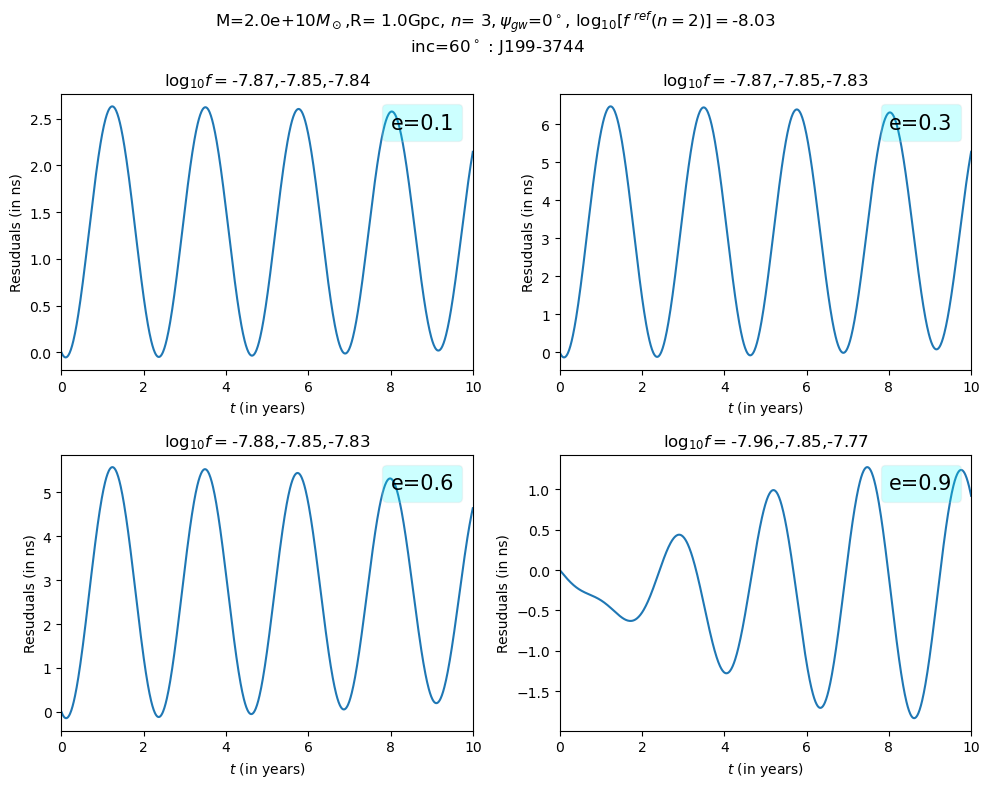

In [9]:
n=3
plt.figure(figsize=(10,8))
earr=[0.1,0.3,0.6,0.9]
s=1
while s<=4:
    plt.subplot(2,2,s)
    fs=waveform(m1,m2,earr[s-1],n,i,f_obs,n_obs,r,t_arr[-1],key)[2]
    plt.plot(t_arr/yr,response(m1,m2,earr[s-1],n,i,f_obs,n_obs,r,ti,t_arr
             ,key,gwra, gwdec, psrra, psrdec,
             psigw)/1e-9,label='e='+str(earr[s-1]))
    plt.title('$\log_{10} f=$'
            +str("{:.2f}".format(log10(fs[0])))+','+str("{:.2f}".format(log10(fs[1])))+
             ','+str("{:.2f}".format(log10(fs[2]))))
    plt.legend(facecolor='cyan', framealpha=0.2,handlelength=0, 
               handletextpad=0, fancybox=True,fontsize=15,loc='upper right')
    plt.xlim([t_arr[0]/yr,t_arr[-1]/yr])
    s+=1
    plt.xlabel(r'$t$ (in years)')
    plt.ylabel('Resuduals (in ns)')

plt.suptitle('M='+str("{:.1e}".format((m1+m2)/MS))+r"$M_\odot$,"'R= '+str("{:.1f}".format(r/Gpc))
             +'Gpc, '+r'$n$= '+str(n)+'$, \psi_{gw}$='+str("{:.0f}".format(psigw*180/pi))+'$^\circ$'
             +r', $\log_{10}[f^{ \ ref}( n=$'+str(n_obs)+')$]=$'
             +str("{:.2f}".format(log10(f_obs)))+'\n inc='+str("{:.0f}".format(i*180/pi))+'$^\circ$ : J'
             +str(a1)+str(b1)+str(e1)+str("{0:0=2d}".format(d1)))
plt.tight_layout() 
plt.savefig('cons_n_'+str(n)+'.pdf',dpi=300)
plt.show()